In [1]:
# Import Libraries & Dependencies

from sqlalchemy import create_engine
from config import password
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# 1. Create a connection
# password was added to the config.py (which was on the .ignore list to not b uploaded to the repo)

engine_string = 'postgresql://postgres:' + password + '@localhost:5432/Homework-9'
engine = create_engine(engine_string)
connection = engine.connect()

In [5]:
# 2.a. Create dataframe of employee salaries
data1 = pd.read_sql("SELECT salary FROM salaries", connection)
data1.head()

,salary
0,60117
1,65828
2,40006
3,40054
4,78228


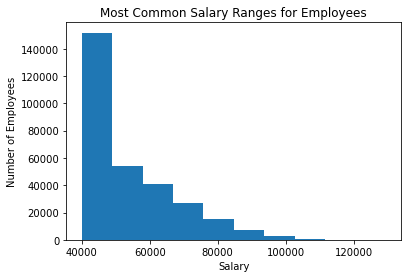

In [6]:
# 2.b. Create a histogram to visualize the most common salary ranges for employees.

sl = data1['salary']
plt.hist(sl,10);
plt.title('Most Common Salary Ranges for Employees');
plt.xlabel('Salary');
plt.ylabel('Number of Employees');

In [12]:
# 3.a. 3. Create a df of average salary by title.
data2 = pd.read_sql("SELECT t.title, s.salary FROM employees e INNER JOIN titles t ON t.title_id = e.emp_title_id INNER JOIN salaries s ON s.emp_no = e.emp_no", connection)

# Create groupby for title salary
title_salary = data2.groupby("title")
title_salary.mean()

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


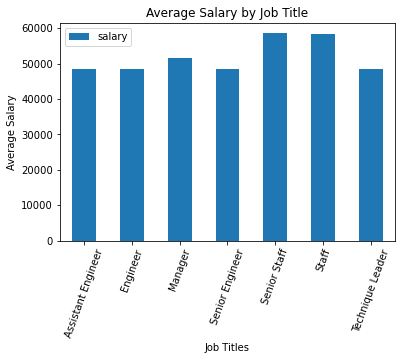

In [18]:
# 3.a. Create a bar chart of average salary by title.
title_salary.mean().plot(kind="bar")
plt.title("Average Salary by Job Title")
plt.xlabel("Job Titles")
plt.ylabel("Average Salary")
plt.xticks(rotation=70)
plt.show()